In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_tsne = pd.read_parquet('data/results/df_tsne.parquet')
df_tsne.head()

,PC1,PC2,Label
0,-18.322725,-16.672157,Syn
1,-54.868546,-18.410553,Syn
2,-45.054012,13.397923,Syn
3,-39.239132,-16.504389,Syn
4,-46.235340,1.965008,Syn


In [2]:
df_tsne_no_benign = pd.read_parquet('data/results/df_tsne_no_benign.parquet')
df_tsne_no_benign.head()

,PC1,PC2,Label
0,-4.541570,-11.997326,Syn
1,-49.244247,-6.464272,Syn
2,-13.750749,8.129172,Syn
3,-34.420837,-13.216851,Syn
4,-25.592207,4.358292,Syn


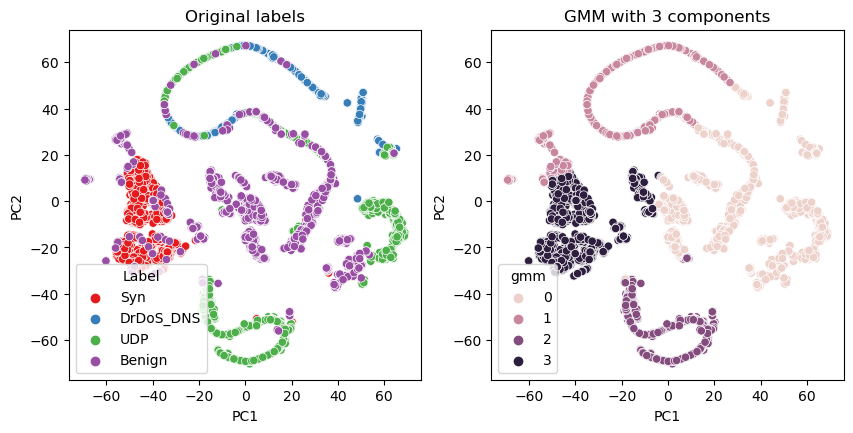

In [18]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=123)
gmm.fit(df_tsne_no_benign[['PC1', 'PC2']])
df_tsne['gmm'] = gmm.predict(df_tsne[['PC1', 'PC2']])

# plot the results
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne, palette='Set1')
plt.title('Original labels')
plt.subplot(222)
sns.scatterplot(x='PC1', y='PC2', hue='gmm', data=df_tsne)
plt.title('GMM with 3 components')
plt.show()